# Classification Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as img
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [42]:
df = pd.read_csv("C:/Users/Taroo2/OneDrive/Desktop/advertising.csv")

**Check the head of ad_data**

In [43]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [45]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

**Create a histogram of the Age**

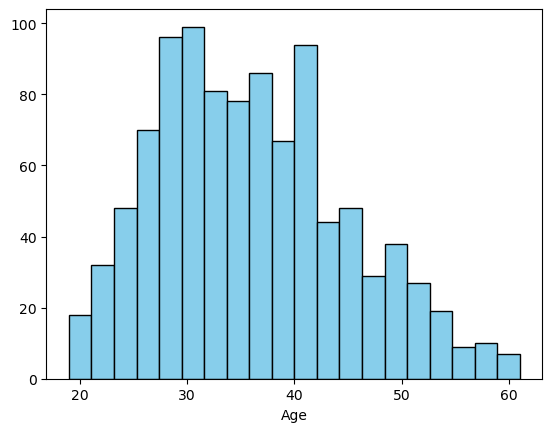

In [46]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.show()


**Create a jointplot showing Area Income versus Age.**

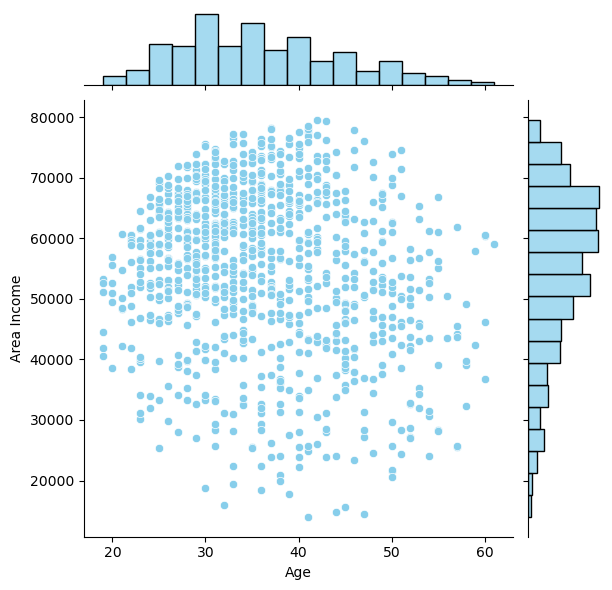

In [47]:
sns.jointplot(x='Age', y='Area Income', data=df, kind='scatter', color='skyblue')
plt.show()


**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [49]:
sns.pairplot(df)

In [50]:
col = ['Ad Topic Line', 'City', 'Country', 'Timestamp']
df.drop(columns = col, inplace = True)

In [51]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Now it's time to do a train test split, and train our model!


You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [52]:
#split data into features and target
x = df.drop(['Clicked on Ad'], axis = 1)
#target / label
y = df['Clicked on Ad']

In [53]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
print("X_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (800, 5)
y_train shape =  (800,)
X_test shape =  (200, 5)
y_test shape =  (200,)


**fit and predict a logistic regression model on the training set.**

In [55]:
LR_model = LogisticRegression()

In [56]:
LR_model.fit(x_train, y_train)
y_pred = LR_model.predict(x_test)

**Print the classification Report and confusion matrix for logistic regression**

In [57]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[85,  4],
       [16, 95]], dtype=int64)

**fit and predict a KNN model on the training set.**

In [59]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

C:\Users\Taroo2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Print the classification Report and confusion matrix for KNN**

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [61]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[85,  4],
       [16, 95]], dtype=int64)

**fit and predict a GaussianNB model on the training set.**

In [62]:
np_model = GaussianNB()
np_model.fit(x_train, y_train)
y_pred = np_model.predict(x_test)

**Print the classification Report and confusion matrix for GaussianNB**

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 83,   6],
       [  5, 106]], dtype=int64)

## **HyperParameter Tuning**

**Choose the best model with the best performance to apply Grid Search to enhance the model performance**

In [65]:
params = {
    'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6]
}

In [66]:
## we choose GaussianNB model is the best model
gs = GridSearchCV(np_model, params, cv =10)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]})

In [67]:
print(gs.best_params_)

{'var_smoothing': 1e-09}


In [68]:
print(gs.best_score_)

0.97


In [69]:
np_model = GaussianNB(var_smoothing = 1e-09)
np_model.fit(x_train, y_train)
y_pred = np_model.predict(x_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

